# **Lorenz Attractor**
This notebook demonstrates the simulation and visualization of the **Lorenz attractor**, a classic example of a nonlinear dynamical system exhibiting **chaos**.

Developed by Edward Lorenz in the early 1960s as a simplified model of atmospheric convection, this system is governed by three coupled, nonlinear differential equations. It is a widely studied system in nonlinear dynamics and chaos theory.

We will:
- Define the Lorenz system
- Simulate it using numerical integration
- Visualize trajectories in 3D and phase space
- Explore sensitivity to initial conditions


In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [3]:
def lorenz(t, state, sigma=10, rho=28, beta=8/3):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]


In [4]:
# Time span and initial conditions
t_span = (0, 40)
t_eval = np.linspace(*t_span, 10000)
initial_state = [1.0, 1.0, 1.0]

# Integrate the system
sol = solve_ivp(lorenz, t_span, initial_state, t_eval=t_eval)
x, y, z = sol.y


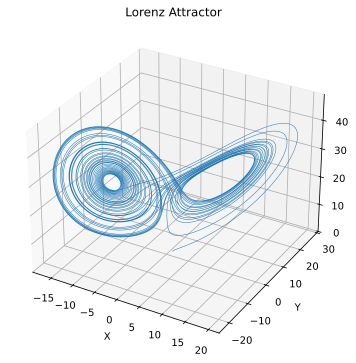

In [15]:
%config InlineBackend.figure_formats = ['svg']
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.5)
ax.set_title("Lorenz Attractor")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


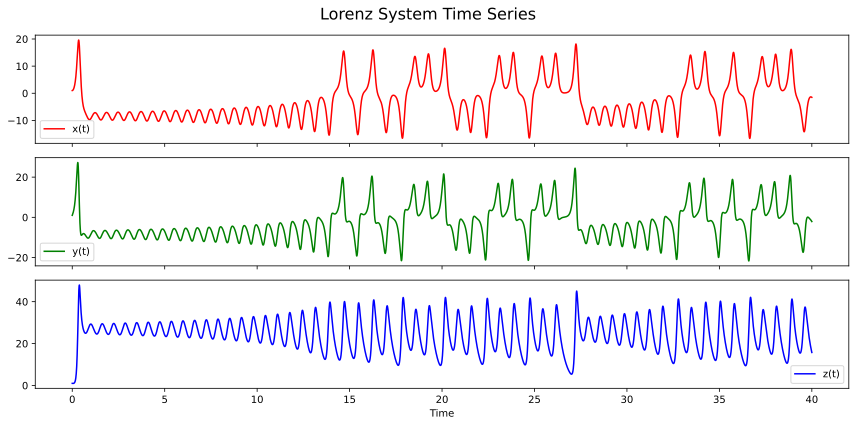

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(12, 6), sharex=True)
axs[0].plot(t_eval, x, label='x(t)', color='r')
axs[1].plot(t_eval, y, label='y(t)', color='g')
axs[2].plot(t_eval, z, label='z(t)', color='b')

for ax in axs:
    ax.legend()
    ax.grid(False)

axs[-1].set_xlabel('Time')
fig.suptitle("Lorenz System Time Series", fontsize=16)
plt.tight_layout()
plt.show()


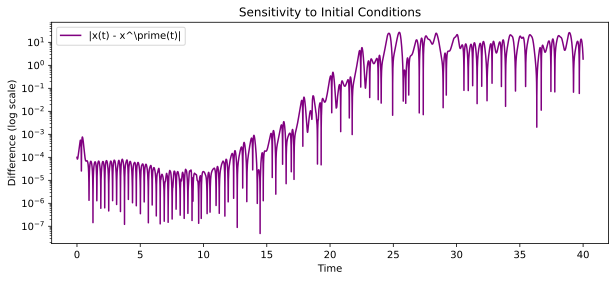

In [14]:
# Slight perturbation in initial condition
initial_state2 = [1.0001, 1.0, 1.0]
sol2 = solve_ivp(lorenz, t_span, initial_state2, t_eval=t_eval)
x2 = sol2.y[0]

plt.figure(figsize=(10, 4))
plt.plot(t_eval, np.abs(x - x2), label='|x(t) - x^\prime(t)|', color='purple')
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Difference (log scale)')
plt.title("Sensitivity to Initial Conditions")
plt.grid(False)
plt.legend()
plt.show()
